# **OBJECT DETECTION MODEL WITH YOLOV11**

**Dataset**:https://universe.roboflow.com/aditikala/football-uzhev/dataset/1

In [ ]:
!nvidia-smi

Tue Feb  4 18:25:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Step 1: Install the ultralytics package

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# Step 2: Install required libraries

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

# Step 3: Download Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xmJ84wLEuvKYtkgIoxP6")
project = rf.workspace("aditikala").project("football-uzhev")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-1 in yolov11:: 100%|██████████| 36924/36924 [00:10<00:00, 3626.79it/s]


In [ ]:
dataset.location

'/content/football-1'

# Step 4: Train YOLO11 Model on Custom Dataset

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11s.pt" epochs=25 imgsz=640 plots=True

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/football-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

# Step 5: Examine Training Results

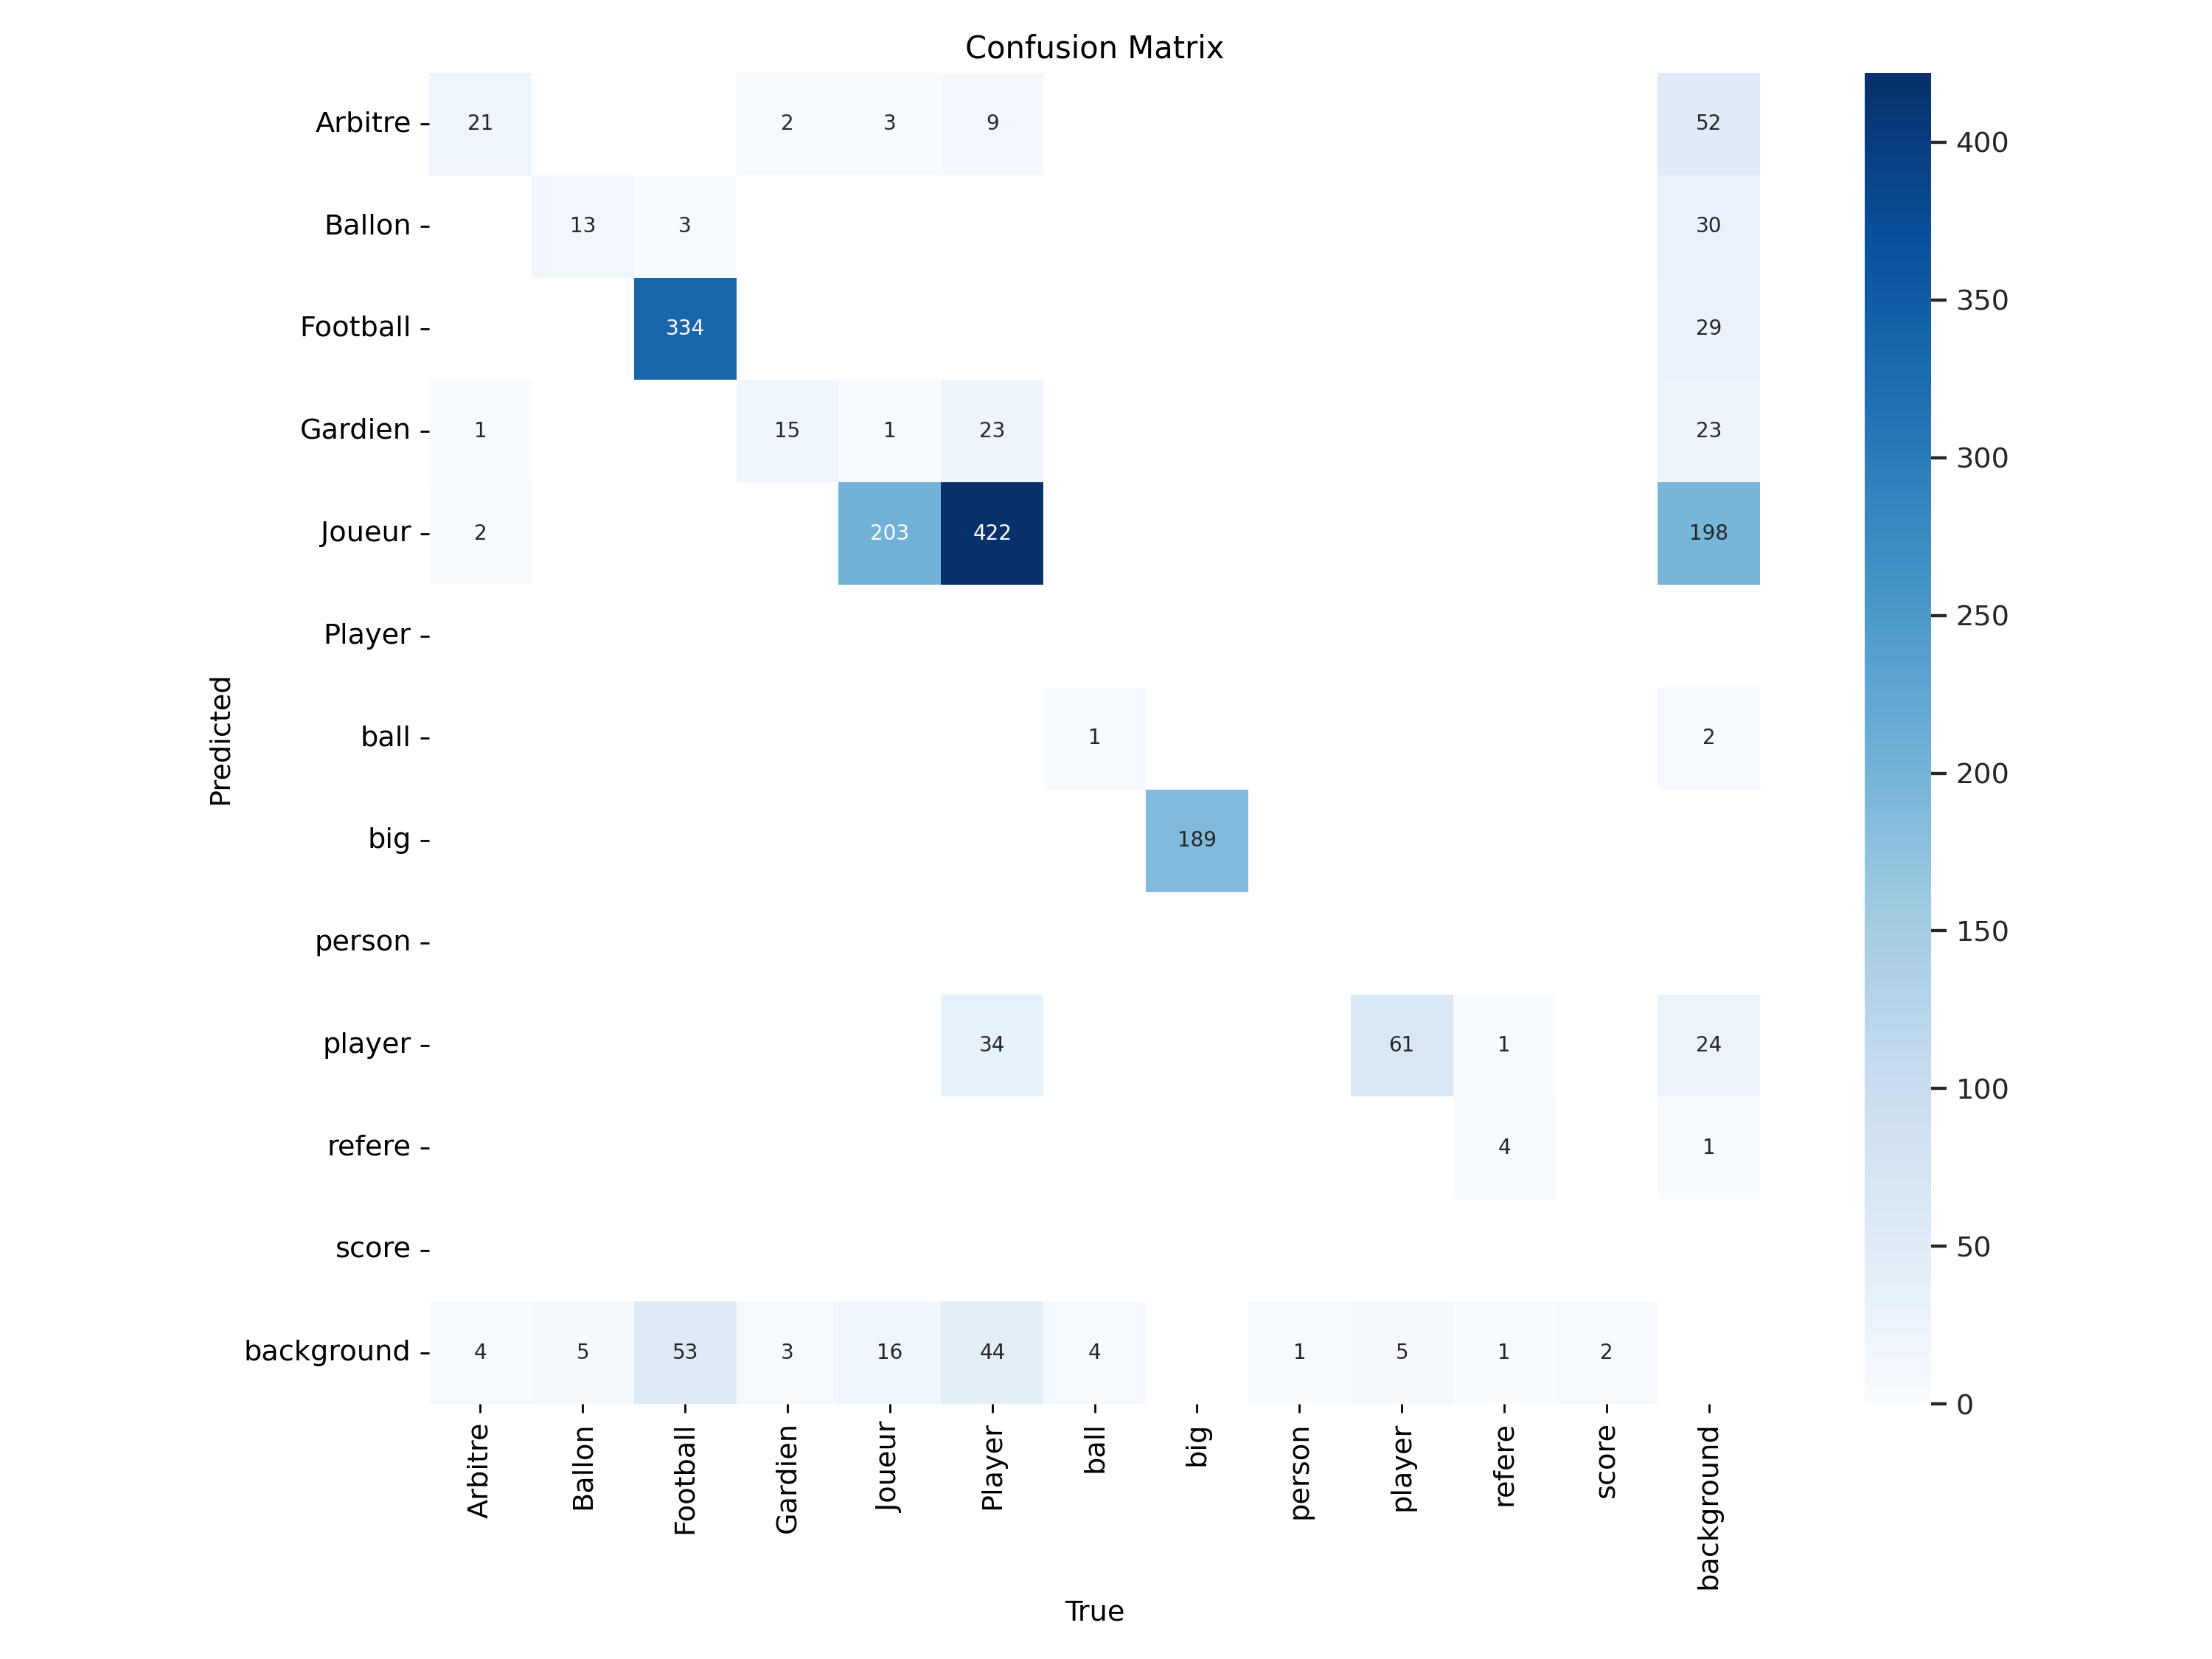

In [ ]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

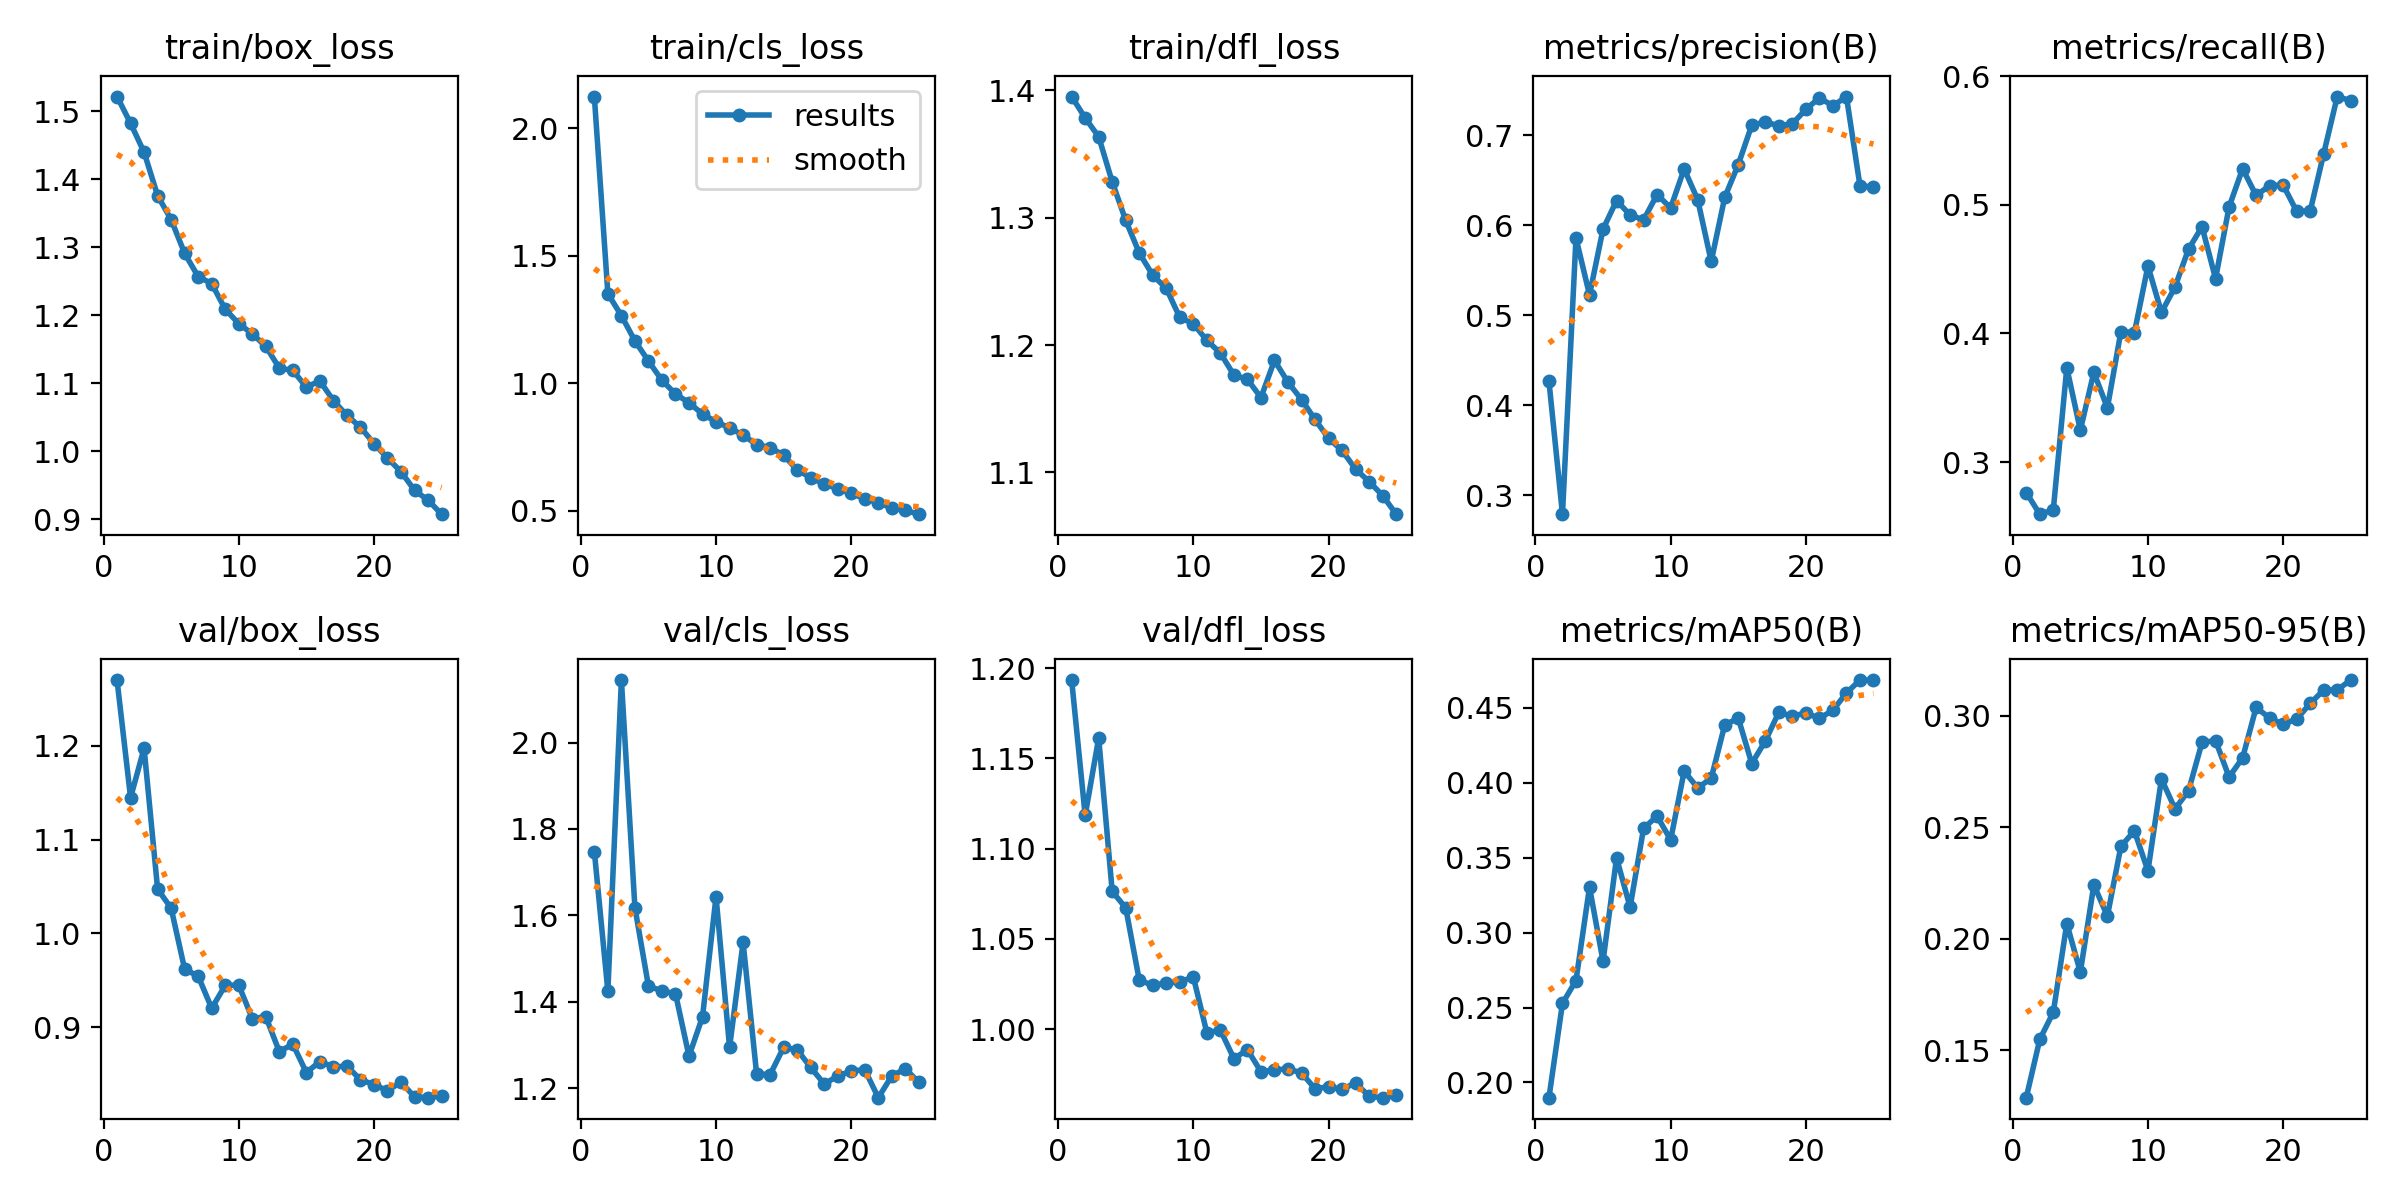

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

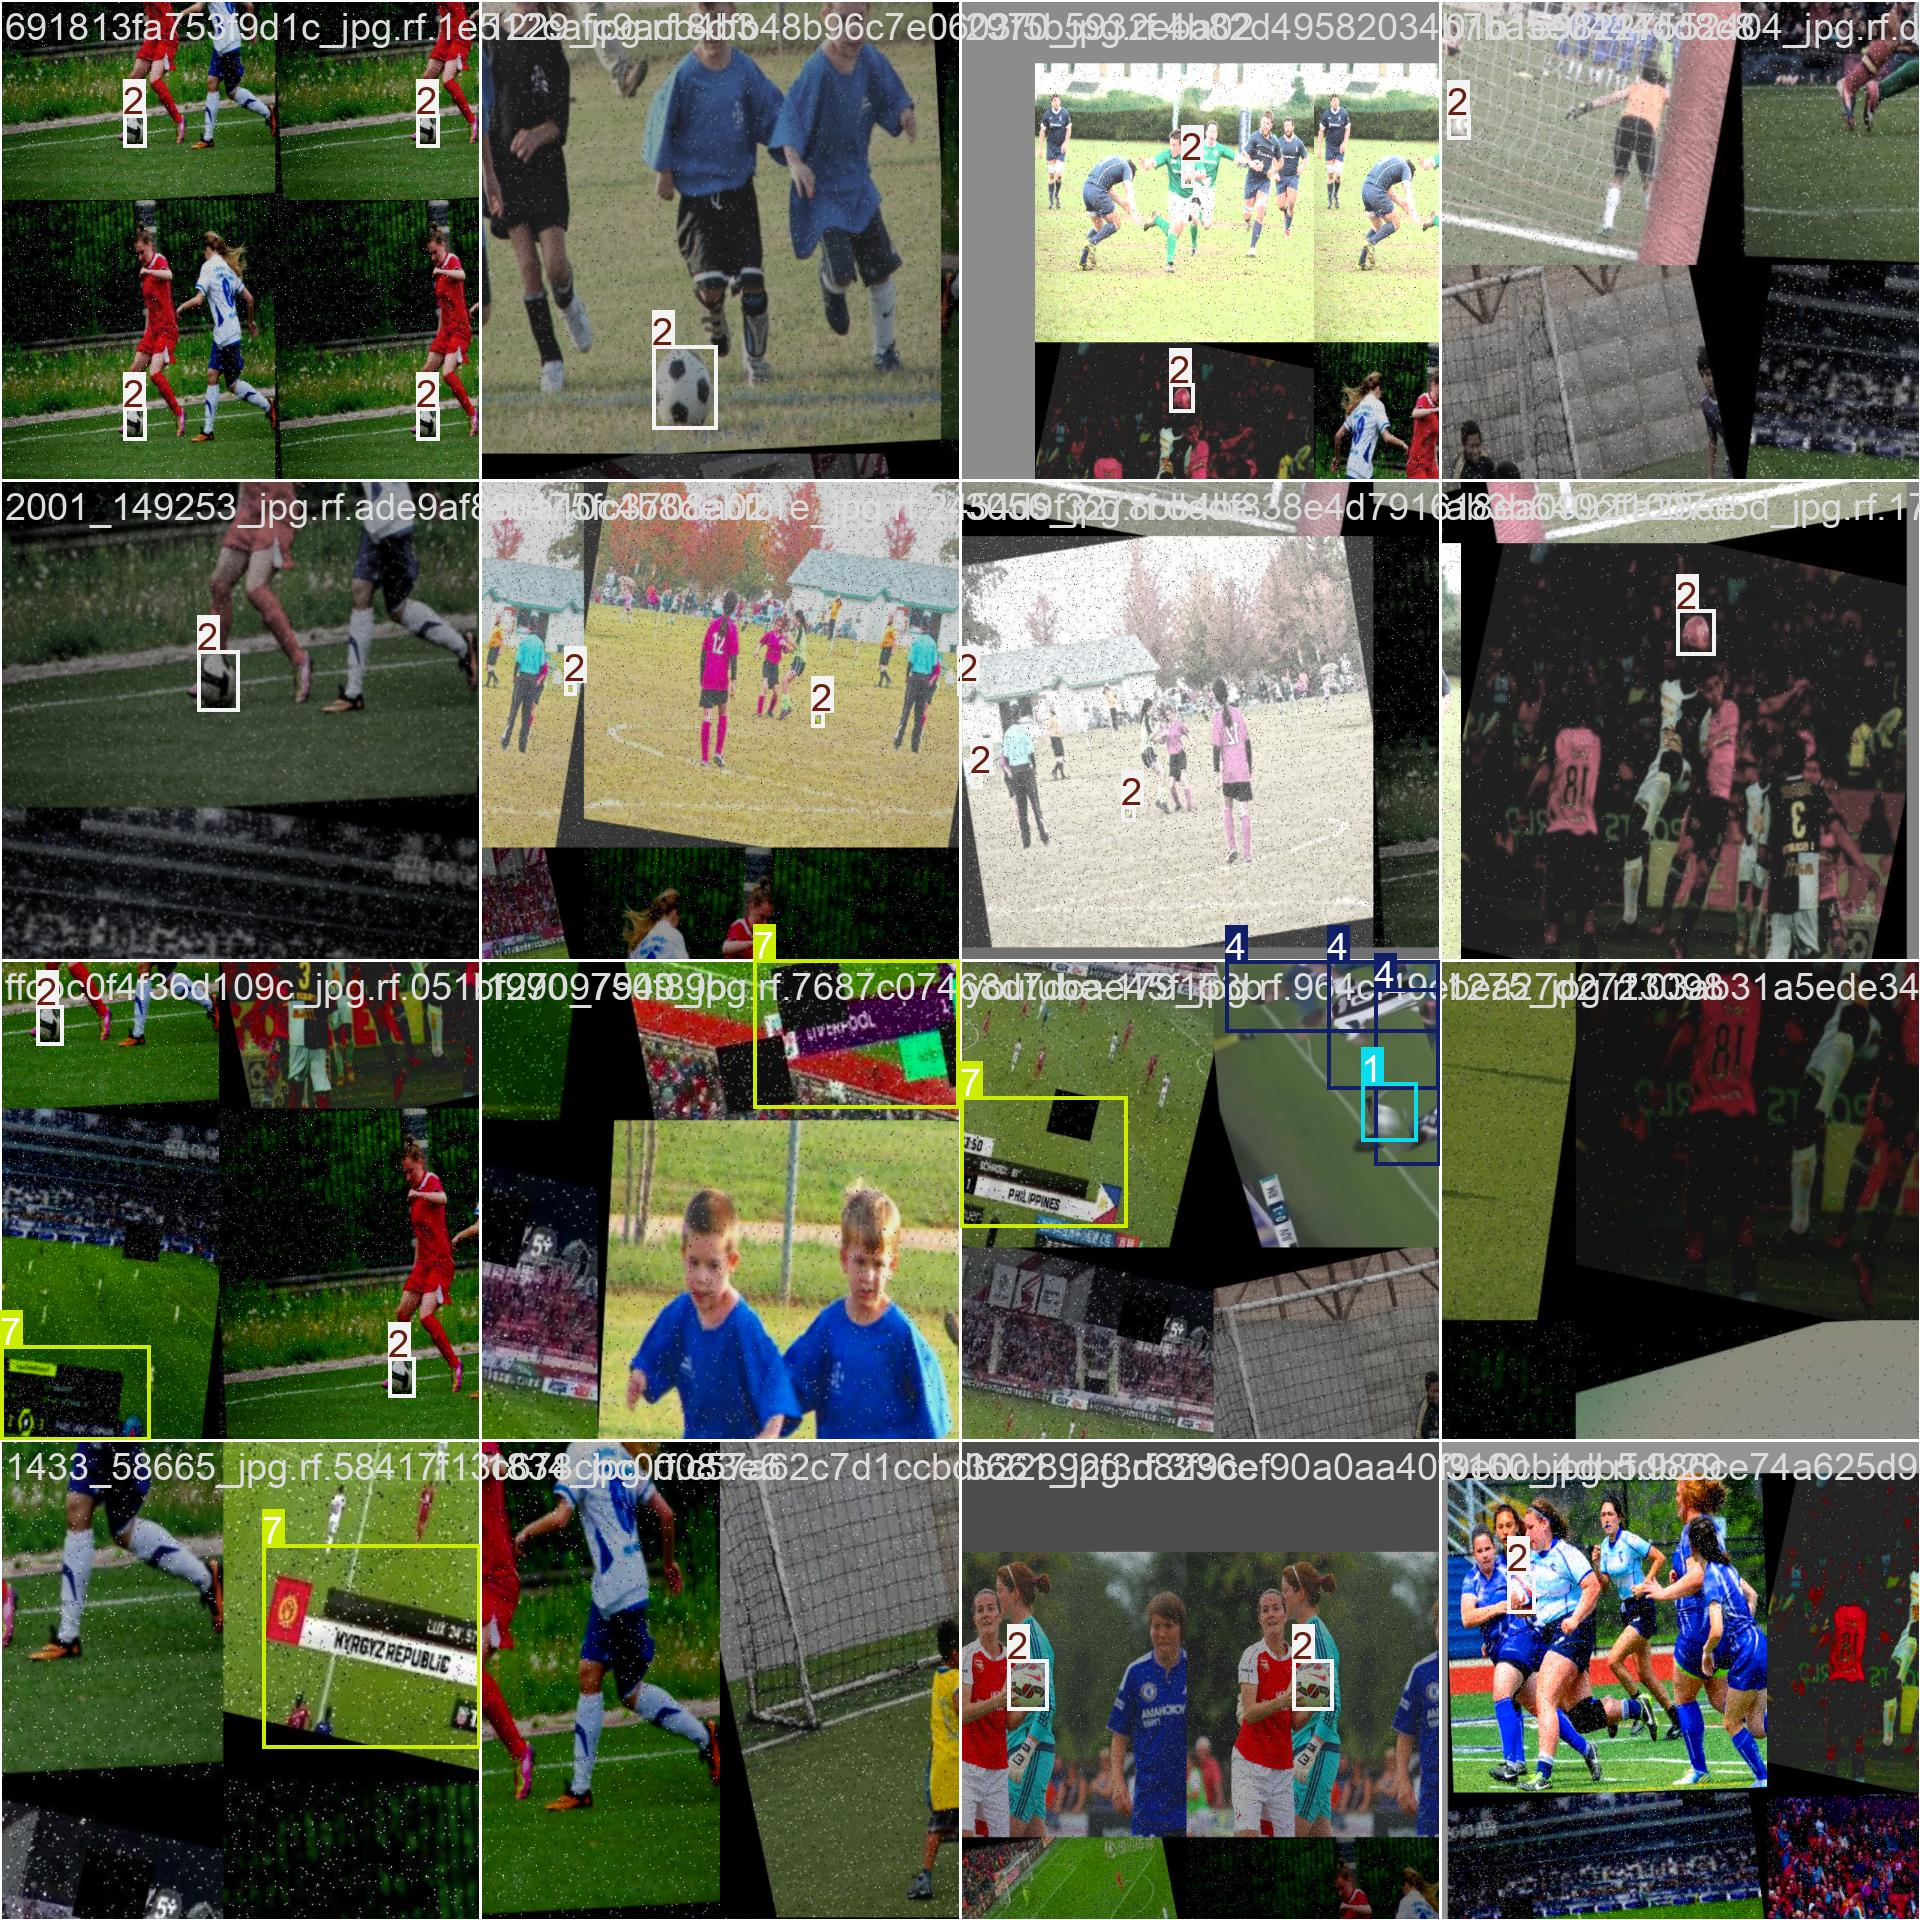

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

# Step 7: Validate Fine-Tuned Model

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Football-Player-Detection-3/valid/labels.cache... 209 images, 1 backgrounds, 0 corrupt: 100% 209/209 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:03<00:00,  3.51it/s]
                   all        209        280      0.738      0.429      0.485      0.248
              football        208        280      0.738      0.429      0.485      0.248
Speed: 2.4ms preprocess, 5.6ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Step 8: Inference with Custom Model on Images

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/171 /content/Football-Player-Detection-3/test/images/102_pp_jpg.rf.12f8bb0b0713dddbc1ae52142b13f36f.jpg: 640x640 1 football, 9.4ms
image 2/171 /content/Football-Player-Detection-3/test/images/125_pp_jpg.rf.ff30ed387376cfa15cc46801a6a0f70d.jpg: 640x640 (no detections), 9.2ms
image 3/171 /content/Football-Player-Detection-3/test/images/136_pp_jpg.rf.70eca4bf6d117b99e1abcdff3d6736c2.jpg: 640x640 1 football, 10.6ms
image 4/171 /content/Football-Player-Detection-3/test/images/144_pp_jpg.rf.51a3930e293b8bc1e41913080d3f4a3d.jpg: 640x640 (no detections), 8.7ms
image 5/171 /content/Football-Player-Detection-3/test/images/145_pp_jpg.rf.4cb57e5af66e978742d5189727723e2e.jpg: 640x640 (no detections), 8.7ms
image 6/171 /content/Football-Player-Detection-3/test/images/155_pp_jpg.rf.8bae8670a3036660f1c96c1e634fc099.jpg: 640x640 (n

# Test on Random Custom Image Data

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1Fv22RcQ_MQ45P8XSNmCusvS-5xy8w53-/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1Fv22RcQ_MQ45P8XSNmCusvS-5xy8w53-
To: /content/pexels-omar-ramadan-1739260-11703671.jpg
100% 708k/708k [00:00<00:00, 137MB/s]


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=pexels-omar-ramadan-1739260-11703671.jpg save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/pexels-omar-ramadan-1739260-11703671.jpg: 448x640 1 football, 43.6ms
Speed: 3.8ms preprocess, 43.6ms inference, 145.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


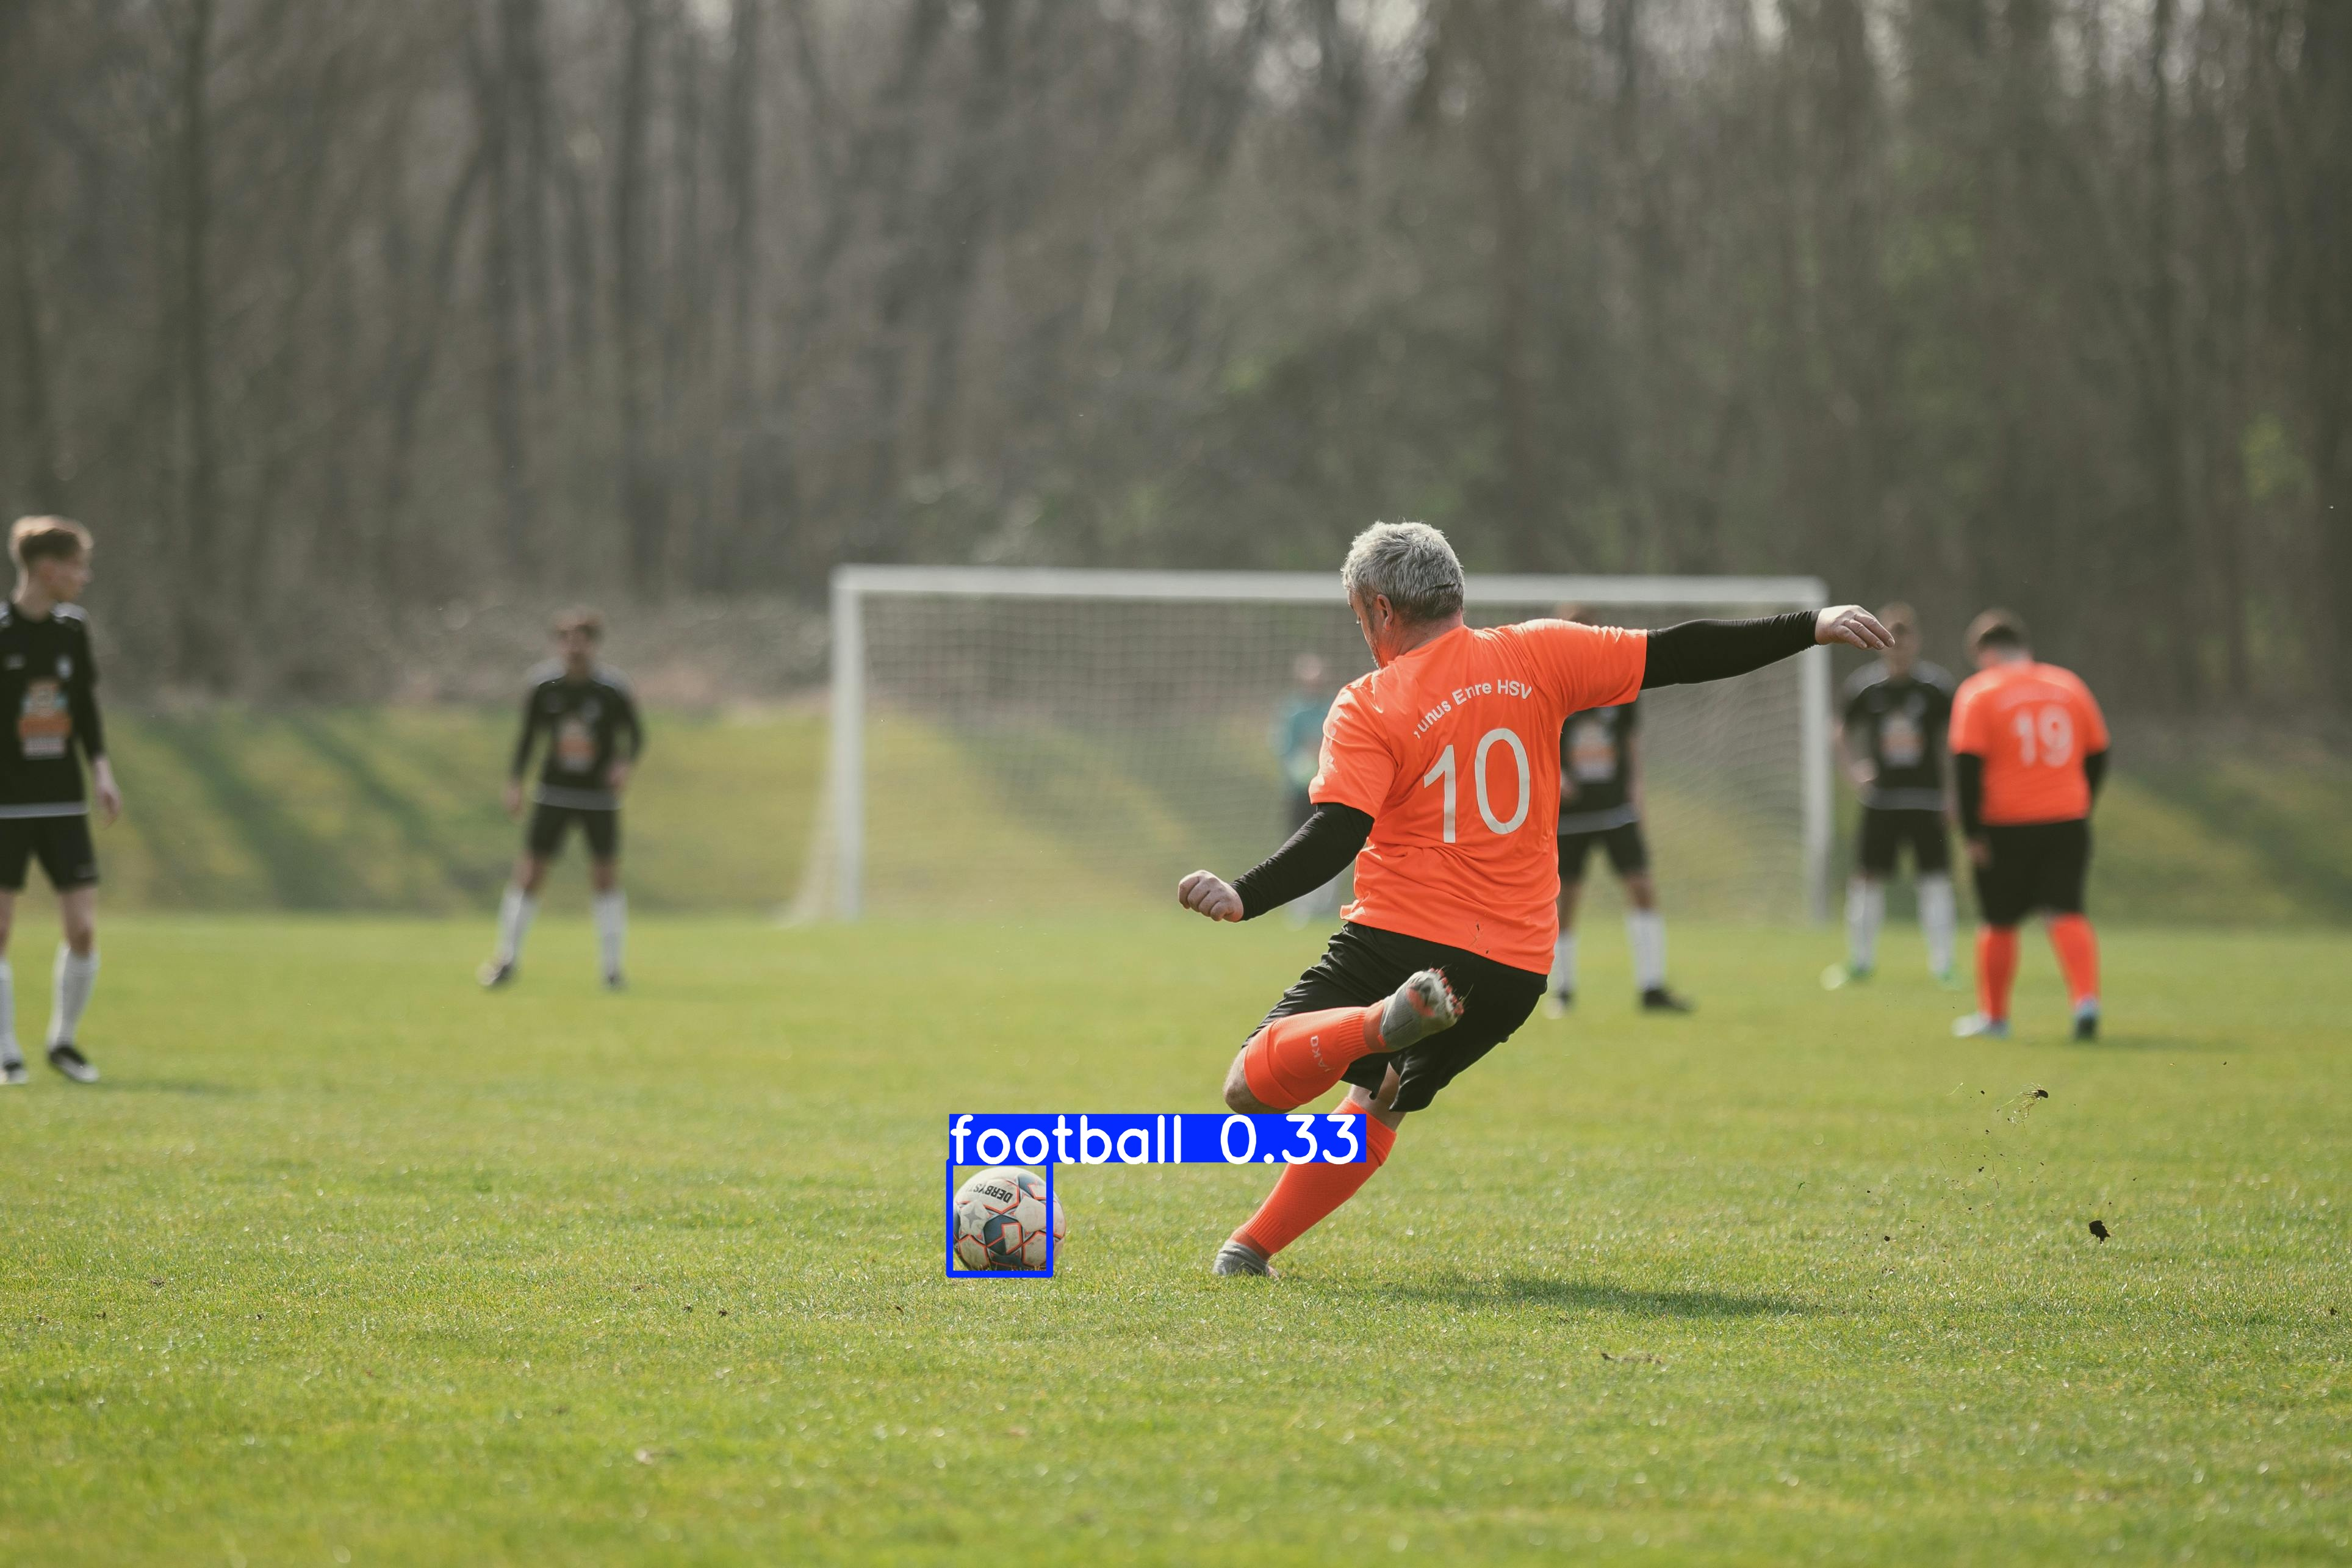

In [ ]:
Image("/content/runs/detect/predict2/pexels-omar-ramadan-1739260-11703671.jpg", width=600)

# Test on Random Video

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1PqESH90lwX962npBHI7sx7Xipkwpp6aj/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1PqESH90lwX962npBHI7sx7Xipkwpp6aj
To: /content/6077718-uhd_3840_2160_25fps.mp4
100% 44.3M/44.3M [00:01<00:00, 22.8MB/s]


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=videotesting.mp4 save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/352) /content/videotesting.mp4: 384x640 1 football, 44.6ms
video 1/1 (frame 2/352) /content/videotesting.mp4: 384x640 1 football, 14.0ms
video 1/1 (frame 3/352) /content/videotesting.mp4: 384x640 1 football, 13.8ms
video 1/1 (frame 4/352) /content/videotesting.mp4: 384x640 1 football, 13.9ms
video 1/1 (frame 5/352) /content/videotesting.mp4: 384x640 (no detections), 14.2ms
video 1/1 (frame 6/352) /content/videotesting.mp4: 384x640 (no detections), 14.4ms
video 1/1 (frame 7/352) /content/videotesting.mp4: 384x640 (no detections), 14.0ms
video 1/1 (frame 8/352) /content/videotesting.mp4: 384x640 (no detections), 14.6ms
video 1/1 (frame 9/352) /content/videotesting.mp4: 384x640 (no detections), 14.2ms
video 1/1 (frame 10/352) /content/videotesting.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 11/352